In [172]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
os.chdir("//Users//chiragkhurana//Desktop")

inp0=pd.read_csv("appp.csv")
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
prev=pd.read_csv('previous_application.csv')
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# Handling and cleaning data

### checking for null values:

In [9]:
inp0.isnull().sum().head(20)

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
dtype: int64

In [13]:
#Removing null values:
inp0=inp0[~inp0.AMT_ANNUITY.isnull()]
          
inp0.isnull().sum().head(20)

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                      0
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
dtype: int64

In [14]:
inp0=inp0[~inp0.AMT_GOODS_PRICE.isnull()]
inp0.isnull().sum().head(20)

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                      0
AMT_GOODS_PRICE                  0
NAME_TYPE_SUITE               1014
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
dtype: int64

In [16]:
inp0=inp0[~inp0.NAME_TYPE_SUITE.isnull()]
inp0.isnull().sum().head(20)

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
dtype: int64

#### Checking for common values in NAME_CONTRACT_TYPE:

In [22]:
### What type of laon have target applied for:
target_counts = inp0['TARGET'].value_counts()
contract_counts = inp0['NAME_CONTRACT_TYPE'].value_counts()
combination_counts = inp0.groupby(['TARGET', 'NAME_CONTRACT_TYPE']).size()
df_loans=pd.DataFrame(combination_counts)

0
TARGET NAME_CONTRACT_TYPE        
0      Cash loans          254040
       Revolving loans      27412
1      Cash loans           23173
       Revolving loans       1582

In [40]:
inp0['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [41]:
prev['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64

## checking for outliers

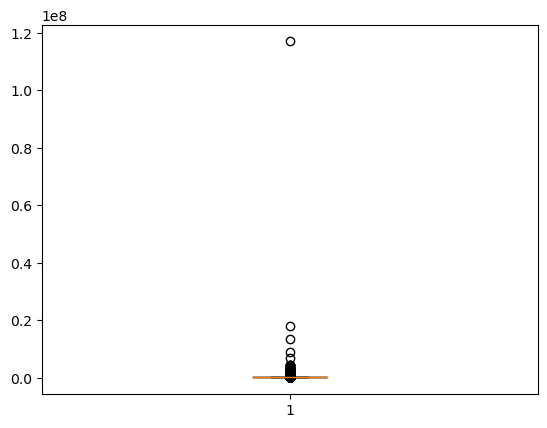

In [47]:
### checking for outliers in income total..
plt.boxplot(inp0.AMT_INCOME_TOTAL)
plt.show()

In [48]:
inp0.AMT_INCOME_TOTAL.mean()

168797.9192969845

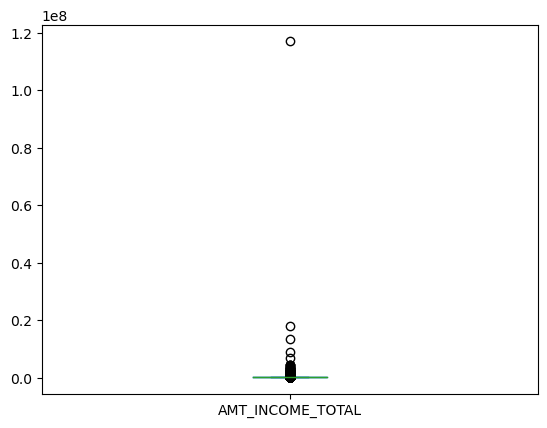

In [57]:
### income more than 150000
inp0[inp0.AMT_INCOME_TOTAL>150000].AMT_INCOME_TOTAL.plot.box()
plt.show()

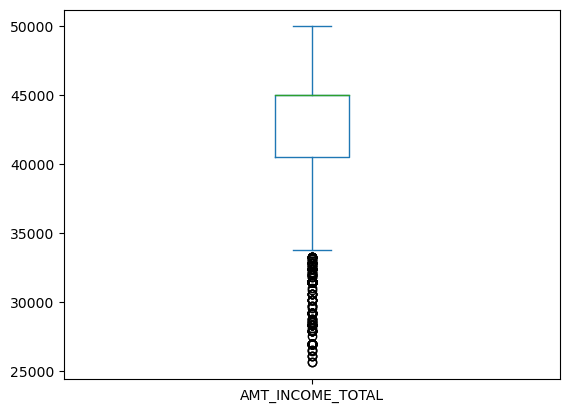

In [64]:
### income more than 50000
inp0[inp0.AMT_INCOME_TOTAL<50000].AMT_INCOME_TOTAL.plot.box()
plt.show()


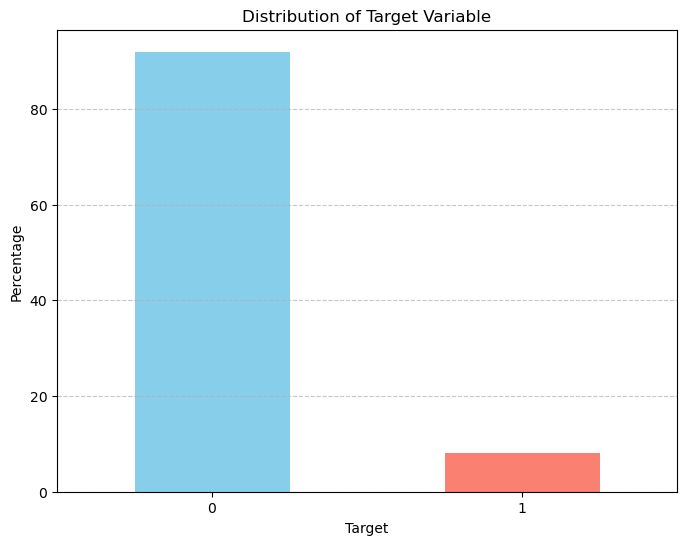

In [77]:
target_counts = inp0['TARGET'].value_counts(normalize=True) * 100 

### bar chart for distribution of the 'Target' variable
plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Target')
plt.ylabel('Percentage')
plt.title('Distribution of Target Variable')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


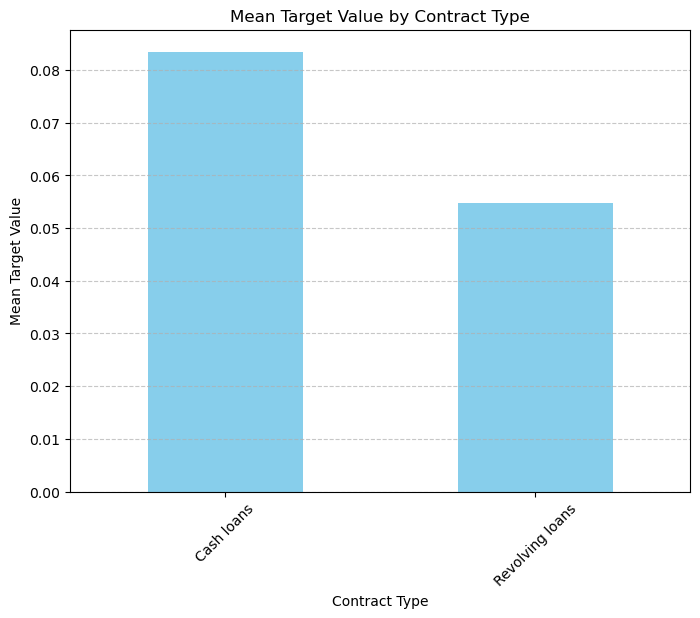

In [67]:
### Mean Target Value by Contract Type
target_by_contract_type = inp0.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean()

plt.figure(figsize=(8, 6))
target_by_contract_type.plot(kind='bar', color='skyblue')
plt.xlabel('Contract Type')
plt.ylabel('Mean Target Value')
plt.title('Mean Target Value by Contract Type')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

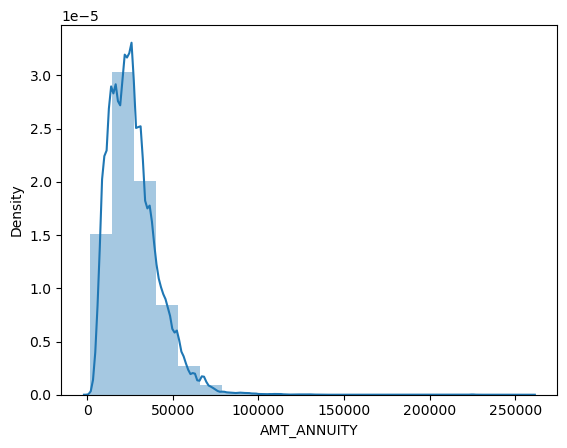

In [173]:
sns.distplot(inp0.AMT_ANNUITY, bins=20)

plt.show()

# Analysing the previous applications 

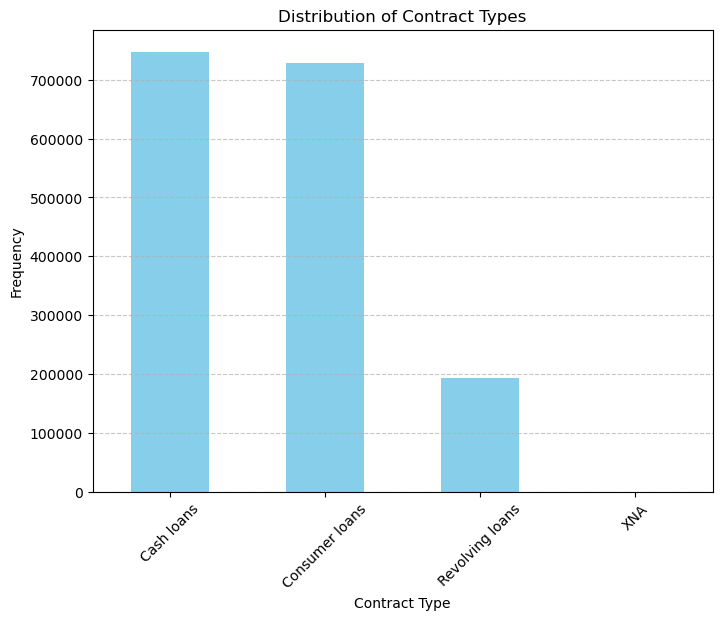

In [69]:
### contract type analyse in previous applictions 
contract_type_counts =prev['NAME_CONTRACT_TYPE'].value_counts()
plt.figure(figsize=(8, 6))
contract_type_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Contract Type')
plt.ylabel('Frequency')
plt.title('Distribution of Contract Types')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

Text(0.5, 1.0, 'Correlation of Contract type and amount annuity of previous applications')

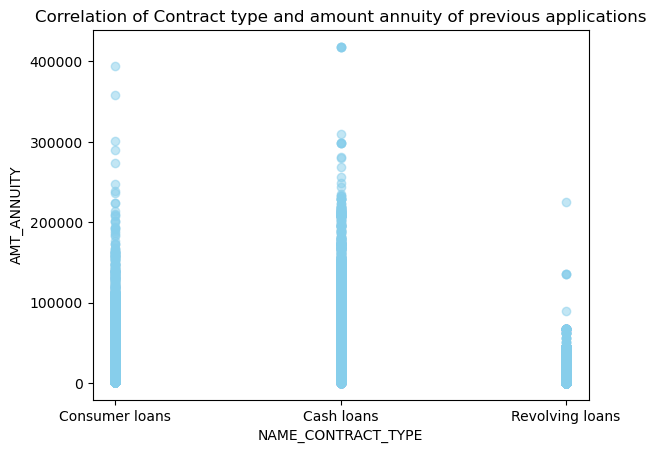

In [91]:
plt.scatter(prev['NAME_CONTRACT_TYPE'], prev['AMT_ANNUITY'], color='skyblue', alpha=0.5)
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('AMT_ANNUITY')
plt.title('Correlation of Contract type and amount annuity of previous applications')


# comparing it with new applictaions...

Text(0.5, 1.0, 'Correlation of Contract type and amount annuity of recent applications')

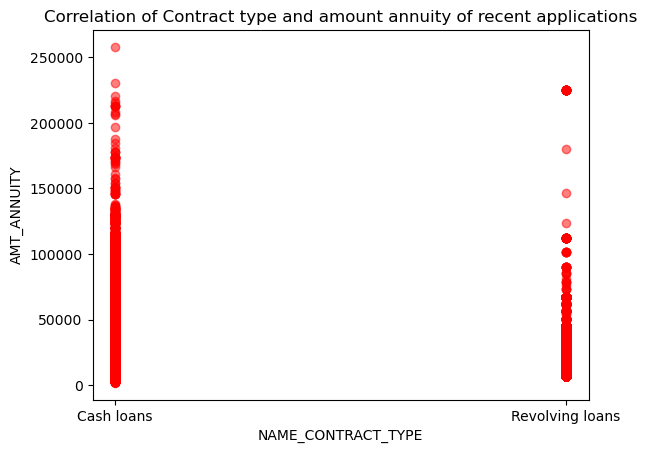

In [92]:
plt.scatter(inp0['NAME_CONTRACT_TYPE'], inp0['AMT_ANNUITY'], color='red', alpha=0.5)
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('AMT_ANNUITY')
plt.title('Correlation of Contract type and amount annuity of recent applications')


####  top correlation by segmenting the data frame w.r.t to the target variable 

In [127]:
columns_to_keep = ['TARGET','AMT_INCOME_TOTAL','AMT_ANNUITY',"AMT_CREDIT"]
df = inp0[columns_to_keep].copy()
df

,TARGET,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_CREDIT
0,1,202500.0,24700.5,406597.5
1,0,270000.0,35698.5,1293502.5
2,0,67500.0,6750.0,135000.0
3,0,135000.0,29686.5,312682.5
4,0,121500.0,21865.5,513000.0
...,...,...,...,...
307506,0,157500.0,27558.0,254700.0
307507,0,72000.0,12001.5,269550.0
307508,0,153000.0,29979.0,677664.0
307509,1,171000.0,20205.0,370107.0


In [163]:
df_target_0 = df[df['TARGET'] == 0]


df_target_1 = df[df['TARGET'] == 1]

correlation_target_0 = df_target_0.corr()
correlation_target_0 = correlation_target_0.drop('TARGET', axis=0)
correlation_target_0 = correlation_target_0.drop('TARGET', axis=1)

(correlation_target_0)


,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_CREDIT
AMT_INCOME_TOTAL,1.000000,0.418953,0.342799
AMT_ANNUITY,0.418953,1.000000,0.771309
AMT_CREDIT,0.342799,0.771309,1.000000


In [167]:
correlation_target_1 = df_target_1.corr()
correlation_target_1 =correlation_target_1.drop('TARGET', axis=0)
correlation_target_1 =correlation_target_1.drop('TARGET', axis=1)
(correlation_target_1)

,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_CREDIT
AMT_INCOME_TOTAL,1.000000,0.046421,0.038131
AMT_ANNUITY,0.046421,1.000000,0.752195
AMT_CREDIT,0.038131,0.752195,1.000000


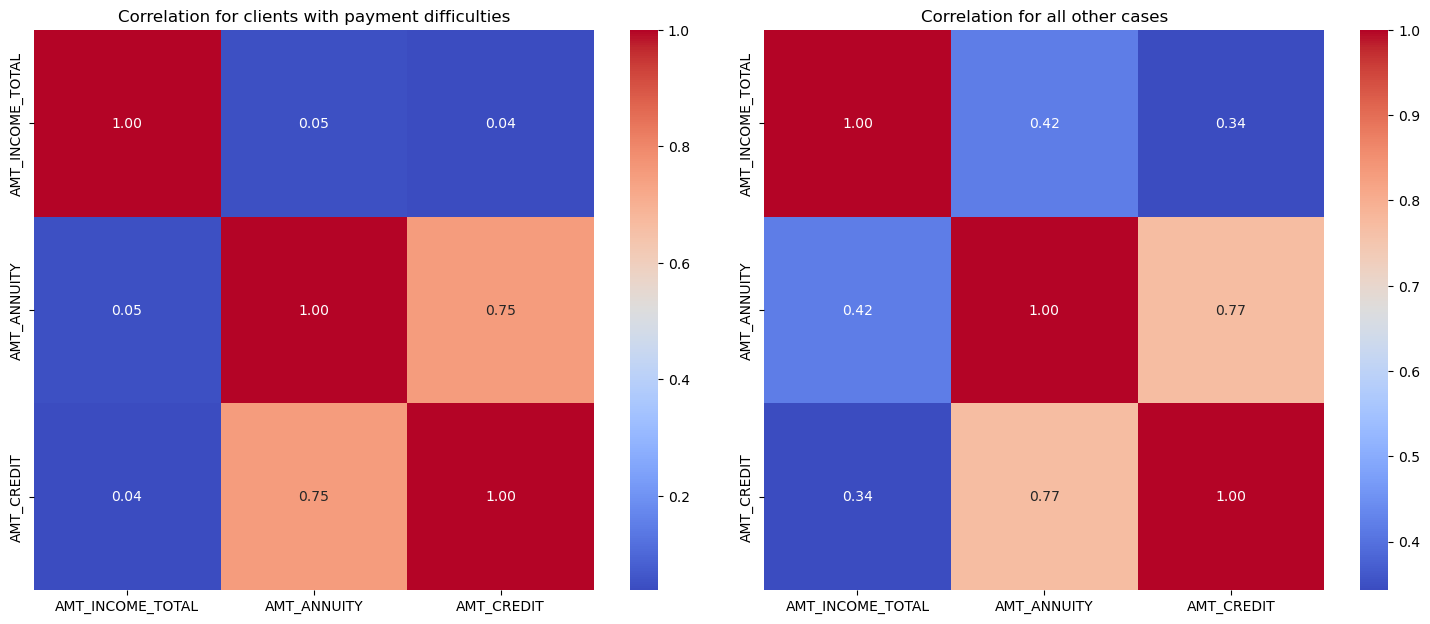

In [168]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.heatmap(correlation_target_1, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation for clients with payment difficulties')

# Plot heatmap for all other cases
plt.subplot(1, 2, 2)
sns.heatmap(correlation_target_0, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation for all other cases')

plt.tight_layout()
plt.show()